### Telecom churn prediction:
**Faseela K Karim**

## Introduction

This code performs Principal Component Analysis (PCA) on the training and test datasets to reduce the dimensionality of the data. It first fits the PCA model to the training data and transforms both the training and test data using this model. Then, the scaled PCA data is fed into the train_neural_network() function, which trains a neural network model with four hidden layers and one output layer on the data for 15 epochs. The test_loss and test_accuracy of the trained model are then computed and printed to the console. This function can be used to train and evaluate multiple neural network models with different configurations of hidden layers and other hyperparameters to identify the best model for predicting customer churn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# #uploading the dataset
# #output of onehot encoding used here,no columns deleted based on collinearity
# df_train=pd.read_csv('/content/drive/My Drive/final_capstone/train_data_onehot.csv',index_col=0)
# df_test=pd.read_csv('/content/drive/My Drive/final_capstone/test_data_onehot.csv',index_col=0)

In [ ]:
#uploading the dataset from local drive
#output of vif encoding used here,output after columns deleted based on collinearity
df_train=pd.read_csv('data/train_data_onehot.csv',index_col=0)
df_test=pd.read_csv('data/test_data_onehot.csv',index_col=0)

In [4]:
#seperating target variable from test and train data
X_train =df_train.drop('churn',axis=1)
X_test=df_test.drop('churn',axis=1)
y_train=df_train.churn
y_test=df_test.churn

In [5]:
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [6]:
df_train_new=df_train
df_test_new=df_test

## Perform PCA, converting PCA Data into DataFrame.

The below code performs PCA on the customer churn dataset and converts the PCA data into data frames. The PCA algorithm is used to reduce the dimensionality of the dataset while preserving the variance of the original data as much as possible. In this case, the number of components is set to 40.

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components=40,random_state=42)

#We also need to drop the cluster labels so that t-sne won't use them when computing distance
pca_data = pca.fit_transform(df_train)

These lines of code perform Principal Component Analysis (PCA) on the training and test datasets to reduce the dimensionality of the data. The resulting PCA data is then converted into data frames, with column names indicating the PCA dimensions. The 'churn' target variable is also added to these data frames.

In [9]:
pca_df = pd.DataFrame(pca_data, columns=[f'PCA D{i+1}' for i in range(pca_data.shape[1])])
# pca_df['kmeans_labels'] = X_train_4['cluster'].values
pca_df['churn'] = df_train_new['churn'].values
pca_df

,PCA D1,PCA D2,PCA D3,PCA D4,PCA D5,PCA D6,PCA D7,PCA D8,PCA D9,PCA D10,...,PCA D32,PCA D33,PCA D34,PCA D35,PCA D36,PCA D37,PCA D38,PCA D39,PCA D40,churn
0,-5653.140172,-57.822665,-1211.464431,199.936002,512.824266,17.203534,-14.638289,155.328671,-38.110939,-32.401432,...,8.884193,-23.870530,5.698419,6.136393,-1.073514,2.157932,-6.694752,-0.209303,1.418054,1
1,-16850.357395,-4806.413977,904.506138,512.459288,-9.140327,-22.480486,-11.933088,65.157219,95.109389,-27.703080,...,-9.004770,-10.178288,0.561037,1.617321,-2.217089,4.967152,3.493269,-2.254307,0.337050,1
2,-16589.159561,-4790.643309,60.844921,26.550083,464.959974,3.545210,-103.097317,154.872085,166.117940,29.477551,...,-0.892067,-2.580773,-0.713908,0.263680,-10.844260,5.901845,1.851731,-1.875585,1.516223,0
3,20898.330678,-7884.724447,1461.365885,-39.459561,82.176442,354.280475,-211.815439,-0.118833,-42.289429,-66.269762,...,-9.926036,-2.296630,-2.791507,5.466238,0.043519,2.370170,2.396949,-1.623121,-4.781691,1
4,38345.327894,606.986152,-2188.675317,-117.407783,-175.309864,-484.031862,-252.145907,-107.068981,141.202840,155.570542,...,-9.760684,-5.087260,-0.865116,-13.150062,-6.269189,1.227569,4.935003,-12.327992,1.182304,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,-34433.275405,13825.173782,-3026.672931,-1828.316853,-545.397272,-745.378228,100.904718,116.202763,-102.998793,131.736234,...,-11.639480,17.326419,-2.413963,-0.016273,-7.854887,18.078175,0.085965,2.149249,-6.568795,0
74996,33295.109163,-4541.180858,-95.819949,199.521957,78.591582,125.579826,249.786053,59.707181,-130.526070,-62.310489,...,-23.975228,-18.720131,4.909556,-2.845707,-9.588297,4.589045,-3.877503,7.179356,-2.970023,1
74997,22343.060798,1687.466911,334.192228,-413.410194,-305.876466,187.611107,-368.526078,-69.047696,7.748831,176.869215,...,12.575508,13.030818,0.438255,-0.917896,-21.525032,-3.619066,5.169505,3.077989,-3.046956,0
74998,15371.627640,-13565.926770,267.064334,89.030974,145.277966,-48.494228,133.356455,-3.683284,37.104766,10.917638,...,4.524457,1.924461,-0.417755,1.807283,2.973042,0.345078,-0.883622,-2.194774,0.541547,0


This code is creating a DataFrame named pca_df_test which contains the transformed PCA data of the test set. The variable pca_test_data is the result of applying the PCA transformation on the test set df_test. The resulting data is stored in pca_test_data.

Finally, the code adds the churn target variable to the pca_df_test DataFrame by extracting it from the original test set df_test_new.

In [10]:
pca_test_data = pca.fit_transform(df_test)

In [11]:
pca_df_test = pd.DataFrame(pca_test_data, columns=[f'PCA D{i+1}' for i in range(pca_data.shape[1])])
# pca_df['kmeans_labels'] = X_train_4['cluster'].values
pca_df_test['churn'] = df_test_new['churn'].values
pca_df_test

,PCA D1,PCA D2,PCA D3,PCA D4,PCA D5,PCA D6,PCA D7,PCA D8,PCA D9,PCA D10,...,PCA D32,PCA D33,PCA D34,PCA D35,PCA D36,PCA D37,PCA D38,PCA D39,PCA D40,churn
0,47906.588893,9599.091270,4269.937009,264.986007,170.316962,131.635853,-36.860630,-81.581932,-7.235148,-188.052376,...,0.111778,3.988888,-12.852251,3.989900,6.407806,5.959079,5.859163,-5.980203,0.424302,1
1,-11980.037373,-9104.023142,412.171392,213.185839,-523.542078,73.664262,-65.833787,-115.938830,13.560420,44.274811,...,0.720425,7.564150,-0.238370,2.075183,-0.420430,2.396224,1.679015,0.491230,1.214062,1
2,44727.921526,6360.832534,-2080.438373,651.734486,247.486535,-389.460832,396.837301,59.276735,86.262602,-158.686691,...,-6.582569,-13.701807,1.809484,-2.577599,6.718173,-1.247279,-0.140046,-6.209745,-31.404112,1
3,-13019.362896,-4103.718707,1130.746187,-314.148090,-140.929633,-5.307736,20.369902,-39.814990,58.296469,113.497682,...,2.260043,-3.491177,-3.385404,0.313830,-14.410731,-6.505978,-0.484457,8.452539,-1.653508,0
4,-2357.611048,7426.925477,-981.781163,77.880154,233.580831,77.060792,-317.318338,-63.886475,-134.460635,29.662857,...,-0.981539,2.114814,4.590763,0.227199,-4.989892,-2.294883,-15.495101,3.616776,-3.808276,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3711.047809,-2726.754427,1365.188627,-255.514820,299.502768,-429.912824,-29.887055,27.112775,14.983107,13.737802,...,-7.179983,-17.221419,-0.035422,-1.370868,4.210654,1.272842,-4.585069,-6.014126,-3.050279,1
24996,-37395.810871,6081.063093,-527.109872,-529.536577,-21.207172,83.958207,107.466972,-19.588038,-51.728751,-37.594698,...,-7.696498,2.463435,-12.511656,5.179240,-3.146325,-1.747281,5.129767,0.092165,1.802665,0
24997,-19006.160104,-2328.500772,-254.847830,77.924995,-29.653347,116.972881,-33.322592,-120.176127,29.633119,46.418145,...,-0.884034,-4.949086,-6.213861,-3.081659,3.895895,-0.796035,0.966522,-1.624714,1.024042,0
24998,-11686.675996,-5571.467732,-40.124232,200.136809,189.267925,-127.423469,96.325070,-131.480829,98.313238,39.712216,...,2.339024,2.856213,0.530624,-4.810678,0.081602,-5.024285,0.109539,0.376248,0.228463,0


## Importing Neural Network Libraries

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

## Function for Neural network Training.


This code defines a function for training a neural network on the customer churn dataset. The function takes in the preprocessed training and test data sets as input, creates a sequential neural network model with four hidden layers and one output layer, compiles the model with binary cross-entropy loss and accuracy metrics, trains the model on the training data for 15 epochs, and evaluates the model on the test set. The trained model, test loss, and test accuracy are returned as output from the function. This function can be used to train and evaluate multiple neural network models with different configurations of hidden layers and other hyperparameters to identify the best model for predicting customer churn.

In [13]:
import tensorflow as tf

def train_neural_network(X_train_scaled, y_train, X_test_scaled, y_test):
    # Create a simple neural network model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.1)

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

    return model, test_loss, test_accuracy



##Here PCA being fed into Neural network


 Here, Principal Component Analysis (PCA) is performed on the training and test datasets to reduce the dimensionality of the data. The resulting PCA data is then fed into a neural network model using the previously defined train_neural_network() function. The StandardScaler() function is used to standardize the PCA data before training and testing the neural network model. Finally, the test loss and accuracy of the model are printed. The use of PCA in this project helps to improve the performance of the neural network by reducing the number of input features while retaining the most important information.

In [14]:
#pca_df has been made earlier
scaler_cluster_pca = StandardScaler()
pca_df_x=pca_df.drop('churn',axis=1)
pca_y=pca_df.churn
pca_df_x_scaled=scaler_cluster_pca.fit_transform(pca_df_x)


In [15]:
scaler_cluster_pca_test = StandardScaler()
pca_df_x_test=pca_df_test.drop('churn',axis=1)
pca_y_test=pca_df_test.churn
pca_df_x_test_scaled=scaler_cluster_pca_test.fit_transform(pca_df_x_test)

In [ ]:
pca_df.head()

,PCA D1,PCA D2,PCA D3,PCA D4,PCA D5,PCA D6,PCA D7,PCA D8,PCA D9,PCA D10,...,PCA D32,PCA D33,PCA D34,PCA D35,PCA D36,PCA D37,PCA D38,PCA D39,PCA D40,churn
0,-28460.303383,16487.760123,164.716151,-1357.804120,-1686.902237,874.765055,84.024320,164.002292,-39.348171,225.755621,...,-47.558100,-7.778550,-6.481125,42.381221,48.277279,-53.460957,-6.980563,28.438284,19.042778,1
1,50339.637537,4839.507628,-1555.096751,1702.097518,-945.311680,62.959672,693.012319,106.087988,-59.360784,-91.624513,...,11.488594,-1.194459,3.076101,-0.957685,-18.015978,3.933953,-1.397250,1.598587,-0.750826,0
2,11644.817798,-12367.512397,221.007346,81.171517,76.491017,-52.164385,18.295366,-44.460307,31.629599,17.026040,...,-1.651127,-0.561292,-0.791615,2.342346,4.333256,1.153355,-0.689269,-2.263793,0.043253,0
3,43530.960086,11025.494804,-1493.839366,62.826041,1717.401476,55.832398,-364.571468,-176.430633,-149.708818,117.830082,...,8.228101,-11.395953,-3.934828,5.865921,1.116595,-3.455240,2.586269,4.687910,-1.714900,1
4,-49055.589270,3098.582028,424.141413,1773.060383,-534.643736,-48.330312,797.664985,16.586014,45.926730,-64.665703,...,2.012168,-3.729176,2.376468,-0.622228,-17.706797,6.516798,-0.800818,-2.170705,0.042350,0


Epoch 1/10
2110/2110 [==============================] - 12s 5ms/step - loss: 13.5510 - accuracy: 0.5017 - val_loss: 0.6931 - val_accuracy: 0.5040
Epoch 2/10
2110/2110 [==============================] - 9s 4ms/step - loss: 0.7461 - accuracy: 0.5008 - val_loss: 0.6933 - val_accuracy: 0.4960
Epoch 3/10
2110/2110 [==============================] - 10s 5ms/step - loss: 0.7071 - accuracy: 0.5037 - val_loss: 0.6934 - val_accuracy: 0.4960
Epoch 4/10
2110/2110 [==============================] - 8s 4ms/step - loss: 0.6971 - accuracy: 0.5053 - val_loss: 0.6932 - val_accuracy: 0.4960
Epoch 5/10
2110/2110 [==============================] - 11s 5ms/step - loss: 0.6978 - accuracy: 0.5053 - val_loss: 0.6933 - val_accuracy: 0.4960
Epoch 6/10
2110/2110 [==============================] - 12s 6ms/step - loss: 0.6991 - accuracy: 0.5047 - val_loss: 0.6933 - val_accuracy: 0.4960
Epoch 7/10
2110/2110 [==============================] - 10s 5ms/step - loss: 0.6979 - accuracy: 0.5053 - val_loss: 0.6933 - val_acc

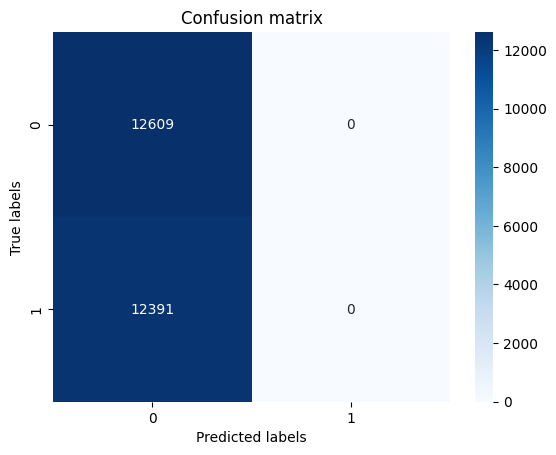

Test Loss: 0.6931092143058777, Test Accuracy: 0.504360020160675
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     12609
           1       0.00      0.00      0.00     12391

    accuracy                           0.50     25000
   macro avg       0.25      0.50      0.34     25000
weighted avg       0.25      0.50      0.34     25000



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
# model, test_loss, test_accuracy = train_neural_network(pca_df_x,pca_y, pca_df_x_test, pca_y_test)
# print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# Train the neural network by calling the nural network training function.
model, test_loss, test_accuracy = train_neural_network(pca_df_x,pca_y, pca_df_x_test, pca_y_test)

# Make predictions on the test set
y_pred = model.predict(pca_df_x_test)
y_pred_classes = np.where(y_pred > 0.5, 1, 0)

# Calculate the confusion matrix
conf_mat = confusion_matrix(pca_y_test, y_pred_classes)

# Display the confusion matrix
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()

# Print the test loss and test accuracy
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

# Calculate the classification report
report = classification_report(pca_y_test, y_pred_classes)

# Print the classification report
print(report)


## Conclusion

The neural network model trained using PCA data has a low test accuracy of 50.44% and high test loss of 0.6931. The confusion matrix also shows that the model is not able to effectively classify churn and non-churn customers. Therefore, the model may not be useful for predicting customer churn, and further improvements or changes to the model architecture may be necessary.